# INSERTING ALL REQUIRED LIBRARY

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import os

# LOADING DATASET AND DATA PRE-PROCESSING

In [10]:
img_dims = (96,96,3)
dataset1 = []
label1 = []


In [3]:
img_path = "C:/Users/atul8/Desktop/gernder/Training/"

In [11]:
images = os.listdir(img_path + "female1/")

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array

In [12]:
for img in images:
    image = cv2.imread(img_path + "female1/"+img)
    image = cv2.resize(image, (96,96))
    image = img_to_array(image)
    dataset1.append(image)
    label1.append(1)
    

In [13]:
len(dataset1)

4000

In [14]:
images = os.listdir(img_path + "male1/")
for img in images:
    image = cv2.imread(img_path + "male1/"+img)
    image = cv2.resize(image, (96,96))
    image = img_to_array(image)
    dataset1.append(image)
    label1.append(0)

In [15]:
len(dataset1)

8000

In [16]:
len(label1)

8000

In [17]:
gen = {0 : "MALE", 1 : "FEMALE"}

In [18]:
dataset1[0]

array([[[37., 38., 38.],
        [41., 43., 43.],
        [41., 43., 43.],
        ...,
        [55., 53., 53.],
        [57., 55., 55.],
        [47., 45., 45.]],

       [[31., 32., 32.],
        [32., 34., 34.],
        [28., 30., 30.],
        ...,
        [59., 57., 57.],
        [55., 53., 53.],
        [67., 65., 65.]],

       [[26., 27., 27.],
        [31., 33., 33.],
        [29., 31., 31.],
        ...,
        [66., 64., 64.],
        [63., 61., 61.],
        [66., 65., 65.]],

       ...,

       [[19., 28., 18.],
        [14., 22., 12.],
        [11., 18., 11.],
        ...,
        [10., 11., 10.],
        [21., 22., 20.],
        [23., 24., 22.]],

       [[14., 25., 16.],
        [ 8., 18., 10.],
        [ 7., 15.,  9.],
        ...,
        [19., 18., 18.],
        [19., 18., 17.],
        [17., 16., 15.]],

       [[13., 24., 16.],
        [ 6., 17.,  9.],
        [ 7., 14.,  9.],
        ...,
        [21., 20., 20.],
        [19., 17., 17.],
        [17., 15., 15.]]

In [19]:
dataset1[0].shape

(96, 96, 3)

In [20]:
dataset1 = np.array(dataset1, dtype = "float") / 255.0

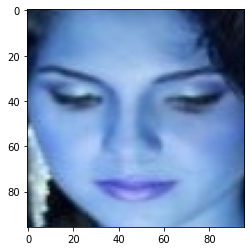

In [21]:
plt.imshow(dataset1[1001])

In [22]:
label = np.array(label)

In [23]:
label[0]

1

# APPLYING TRAIN TEST SPLIT

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset1, label1, test_size=0.20, random_state=42)

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_train = to_categorical(y_train, num_classes=2)

In [28]:
y_test = to_categorical(y_test, num_classes=2)

# PREPARING A  CNN MODEL

In [29]:
model = Sequential()

In [30]:
model.add(layers.Conv2D(32, (3,3), padding="same", activation = "relu", input_shape= (96,96,3)))
model.add(layers.MaxPooling2D(pool_size = (3,3)))
model.add(layers.BatchNormalization(axis = -1))
model.add(layers.Dropout(0.25))

In [31]:
model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D(pool_size = (3,3)))
model.add(layers.BatchNormalization(axis = -1))
model.add(layers.Dropout(0.25))

In [32]:
model.add(layers.Conv2D(64, (3,3), padding="same", activation = "relu", input_shape= (96,96,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.BatchNormalization(axis = -1))
model.add(layers.Dropout(0.25))

In [33]:
model.add(layers.Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.BatchNormalization(axis = -1))
model.add(layers.Dropout(0.25))

In [34]:
model.add(layers.Conv2D(128, (3,3), padding="same", activation = "relu", input_shape= (96,96,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.BatchNormalization(axis = -1))
model.add(layers.Dropout(0.25))

In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

# OUTPUT LAYER AND MODEL COMPILER

In [36]:
model.add(layers.Dense(2, activation = "softmax"))

In [41]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics= ["accuracy"])

In [42]:
model

In [43]:
model.fit( X_train, y_train, epochs = 25, verbose=1)

Epoch 1/25
200/200 [==============================] - 78s 246ms/step - loss: 0.7895 - accuracy: 0.6667
Epoch 2/25
200/200 [==============================] - 47s 236ms/step - loss: 0.4293 - accuracy: 0.8298
Epoch 3/25
200/200 [==============================] - 49s 247ms/step - loss: 0.3077 - accuracy: 0.8764
Epoch 4/25
200/200 [==============================] - 50s 249ms/step - loss: 0.2539 - accuracy: 0.9025
Epoch 5/25
200/200 [==============================] - 48s 241ms/step - loss: 0.2231 - accuracy: 0.9122
Epoch 6/25
200/200 [==============================] - 47s 236ms/step - loss: 0.2096 - accuracy: 0.9206
Epoch 7/25
200/200 [==============================] - 50s 250ms/step - loss: 0.1882 - accuracy: 0.9300
Epoch 8/25
200/200 [==============================] - 48s 240ms/step - loss: 0.1738 - accuracy: 0.9322
Epoch 9/25
200/200 [==============================] - 48s 239ms/step - loss: 0.1666 - accuracy: 0.9373
Epoch 10/25
200/200 [==============================] - 47s 233ms/step - l

# EVALUATING THE ACCURACY

In [46]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 4s 72ms/step - loss: 0.1572 - accuracy: 0.9531


[0.15722639858722687, 0.953125]

# PREDICTIONS

In [52]:
img = cv2.imread("C:/Users/atul8/Desktop/gernder/Validation/female/112953.jpg.jpg")

In [53]:
img

array([[[ 40,  53,  79],
        [ 21,  35,  58],
        [ 26,  37,  59],
        ...,
        [ 13,  22,  32],
        [ 13,  17,  28],
        [ 20,  25,  34]],

       [[ 42,  55,  81],
        [ 15,  29,  52],
        [ 14,  25,  47],
        ...,
        [  8,  14,  25],
        [  8,  12,  23],
        [ 14,  19,  28]],

       [[ 42,  55,  81],
        [ 15,  29,  52],
        [  9,  20,  42],
        ...,
        [  5,  11,  22],
        [  3,   7,  18],
        [  9,  14,  23]],

       ...,

       [[ 69,  72,  80],
        [ 71,  74,  82],
        [ 73,  77,  82],
        ...,
        [ 87, 100, 138],
        [ 63,  76, 114],
        [ 40,  53,  91]],

       [[ 69,  72,  80],
        [ 70,  74,  79],
        [ 72,  76,  81],
        ...,
        [ 81,  94, 132],
        [ 60,  73, 111],
        [ 40,  53,  91]],

       [[ 66,  72,  77],
        [ 68,  74,  79],
        [ 71,  75,  80],
        ...,
        [ 78,  94, 131],
        [ 64,  76, 116],
        [ 46,  58,  98]]

In [55]:
img = cv2.resize(img, (96,96))
img = img_to_array(img)

In [56]:
img.shape

(96, 96, 3)

In [57]:
img

array([[[ 40.,  53.,  79.],
        [ 25.,  38.,  62.],
        [ 23.,  35.,  58.],
        ...,
        [ 12.,  20.,  30.],
        [ 14.,  18.,  29.],
        [ 19.,  24.,  33.]],

       [[ 42.,  55.,  81.],
        [ 21.,  35.,  58.],
        [ 13.,  26.,  48.],
        ...,
        [  7.,  12.,  23.],
        [  8.,  12.,  23.],
        [ 13.,  18.,  27.]],

       [[ 42.,  55.,  81.],
        [ 22.,  36.,  60.],
        [ 12.,  24.,  48.],
        ...,
        [  4.,   9.,  20.],
        [  4.,   8.,  18.],
        [  8.,  13.,  22.]],

       ...,

       [[ 69.,  72.,  81.],
        [ 70.,  73.,  82.],
        [ 72.,  76.,  82.],
        ...,
        [ 79.,  92., 129.],
        [ 61.,  74., 111.],
        [ 43.,  56.,  93.]],

       [[ 69.,  72.,  80.],
        [ 70.,  73.,  80.],
        [ 71.,  75.,  80.],
        ...,
        [ 74.,  87., 125.],
        [ 56.,  69., 107.],
        [ 40.,  53.,  91.]],

       [[ 66.,  72.,  77.],
        [ 68.,  73.,  78.],
        [ 70.,  

In [58]:
img = np.array(img,dtype = "float")/255.0

In [59]:
img

array([[[0.15686275, 0.20784314, 0.30980392],
        [0.09803922, 0.14901961, 0.24313725],
        [0.09019608, 0.1372549 , 0.22745098],
        ...,
        [0.04705882, 0.07843137, 0.11764706],
        [0.05490196, 0.07058824, 0.11372549],
        [0.0745098 , 0.09411765, 0.12941176]],

       [[0.16470588, 0.21568627, 0.31764706],
        [0.08235294, 0.1372549 , 0.22745098],
        [0.05098039, 0.10196078, 0.18823529],
        ...,
        [0.02745098, 0.04705882, 0.09019608],
        [0.03137255, 0.04705882, 0.09019608],
        [0.05098039, 0.07058824, 0.10588235]],

       [[0.16470588, 0.21568627, 0.31764706],
        [0.08627451, 0.14117647, 0.23529412],
        [0.04705882, 0.09411765, 0.18823529],
        ...,
        [0.01568627, 0.03529412, 0.07843137],
        [0.01568627, 0.03137255, 0.07058824],
        [0.03137255, 0.05098039, 0.08627451]],

       ...,

       [[0.27058824, 0.28235294, 0.31764706],
        [0.2745098 , 0.28627451, 0.32156863],
        [0.28235294, 0

In [60]:
img.shape

(96, 96, 3)

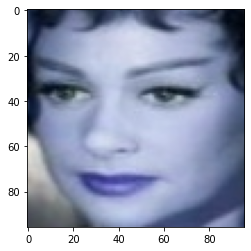

In [61]:
plt.imshow(img)

In [62]:
img1 = img.reshape(1,96,96,3)

In [63]:
img1.shape

(1, 96, 96, 3)

In [64]:
gen[np.argmax(model.predict(img1))]

'FEMALE'